In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sn 
import matplotlib.pyplot as plt 
import plotly 
import plotly.express as px

In [21]:
df= pd.read_csv('C:/Users/User/Downloads/financial_risk_assessment (1).csv')
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [23]:
df.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


In [24]:
df= df.drop_duplicates()

In [25]:
print(df.isnull().sum())

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64


In [26]:
df['Income'].fillna(0,inplace=True)
df['Credit Score'].fillna(0, inplace= True)
df['Loan Amount'].fillna(0,inplace=True)
df['Assets Value'].fillna(0,inplace = True)
df['Number of Dependents'].fillna(0,inplace=True)
df['Previous Defaults'].fillna(0,inplace = True)

In [27]:
print(df.isnull().sum())

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64


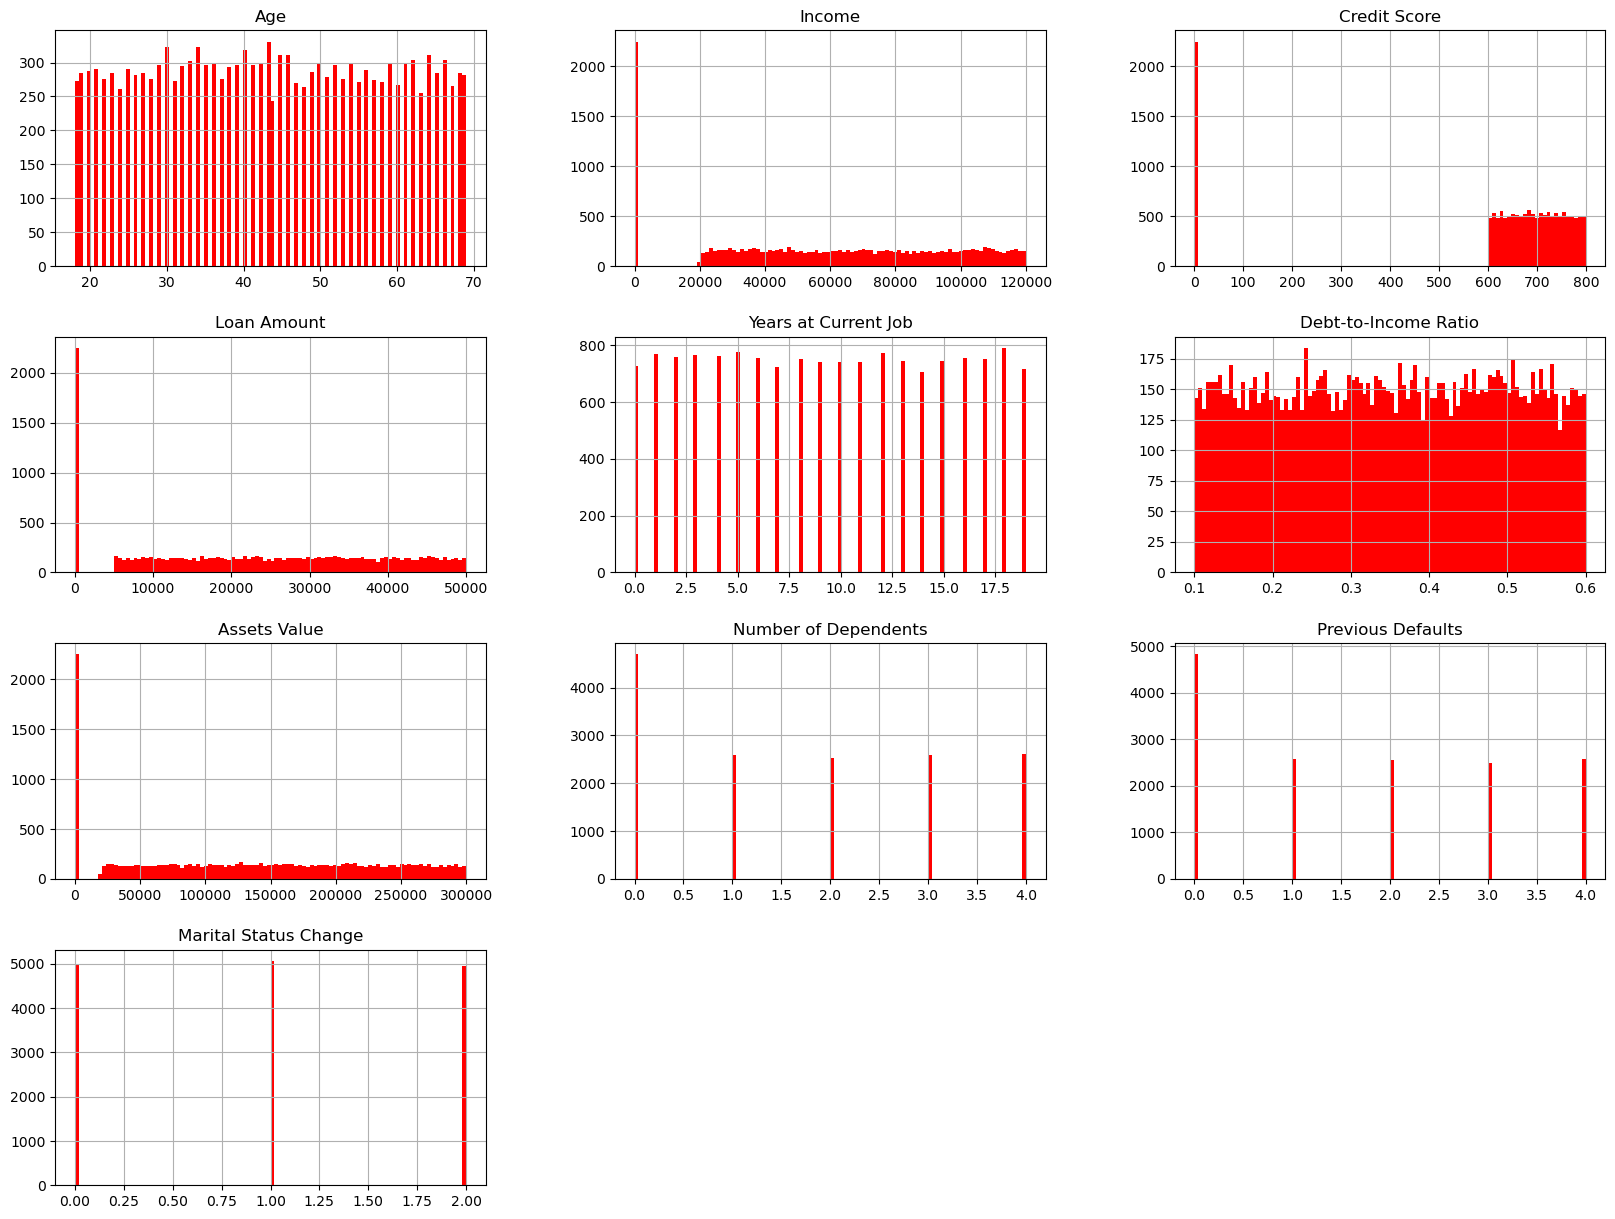

In [28]:
df.hist (bins= 100, figsize = (20,15),color = "Red") 
plt.show()

In [29]:
risktakingvalue= {'High': 0, 'Low':1, 'Medium' : 2} 
df['Risk Rating']= df['Risk Rating'].map(risktakingvalue)
gendervalue = { 'Male' :0, 'Female' :1, 'Non-binary' :2 } 
df['Gender'] = df ['Gender'].map(gendervalue)
educationlavel = {'PhD' :0, 'Bachelors' :1, 'Masters' :2}
df['Education Level'] = df['Education Level'].map(educationlavel)
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,0,0.0,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,1
1,57,1,NaN,Widowed,0.0,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,2
2,21,2,NaN,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,2
3,59,0,NaN,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,2
4,25,2,NaN,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,0.0,New Heather,IL,Namibia,3.0,1,1


In [11]:
from sklearn.model_selection import train_test_split


In [30]:
x = df.drop (['Marital Status','Education Level', 'Loan Purpose', 'Employment Status','Payment History', 'City','State','Risk Rating','Country'],axis =1 )
y = df ['Risk Rating']

In [31]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=40, random_state= 100)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
knn = KNeighborsClassifier()

In [35]:
knn.fit (x_train,y_train)

KNeighborsClassifier()

In [37]:
y_pred = knn.predict(x_test)
print (y_pred)

[2 1 2 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 0 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1 1 2
 1 2 2]


In [42]:
accuracy = accuracy_score (y_test,y_pred)

In [44]:
print (accuracy)

0.5


In [45]:
from sklearn import metrics 

In [47]:
print (metrics.classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.72      0.62      0.67        29
           2       0.14      0.22      0.17         9

    accuracy                           0.50        40
   macro avg       0.29      0.28      0.28        40
weighted avg       0.55      0.50      0.52        40



In [48]:
print (metrics.confusion_matrix(y_test,y_pred))

[[ 0  0  2]
 [ 1 18 10]
 [ 0  7  2]]


In [49]:
from sklearn.linear_model import LogisticRegression 

In [50]:
model = LogisticRegression()

In [51]:
model.fit (x_train,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred = model.predict (x_test)

In [54]:
accuracy= accuracy_score (y_test,y_pred)
print (accuracy)

0.725


In [56]:
conf_matrix =metrics.confusion_matrix(y_test,y_pred)

In [57]:
print (conf_matrix)

[[ 0  2  0]
 [ 0 29  0]
 [ 0  9  0]]


In [58]:
classification_report = metrics.classification_report (y_test,y_pred)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
